# Introduction:

The problem at hand involves predicting the 'curb_weight' of automobiles based on a set of explanatory variables. The dataset comprises various attributes such as height, width, length, wheel-base, engine-size, horsepower, peak-rpm, and city-mpg. The goal is to construct linear regression models that effectively predict 'curb_weight' using these explanatory variables. Additionally, we aim to evaluate these models through K-fold cross-validation and select the preferred model based on the average R^2 scores.

### Steps to Address the Problem:

1. Data Loading and Exploration

2. Exploratory Data Analysis (EDA)

3. Linear Regression Modeling

4. K-Fold Cross-Validation

5. Model Evaluation and Selection

In [1]:
# import the libraries
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Assign the columnn names and use the specific columns using usecols
column_names = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration", "num_of_doors", "body_style", "drive_wheels",
                "engine_location", "wheel_base", "length", "width", "height", "curb_weight", "engine_type", "num_cylinders", "engine_size",
                "fuel_system", "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]

usecols = ['height', 'width', 'length', 'wheel_base', 'engine_size', 'horsepower', 'peak_rpm', 'city_mpg', 'curb_weight']

# Load the github dataset
url = "https://raw.githubusercontent.com/Ansuman21/DAV-6150/main/M2_Data.csv"

df = pd.read_csv(url, sep=",", names=column_names, usecols=usecols)

# print first 5 values
df.head(5)

,wheel_base,length,width,height,curb_weight,engine_size,horsepower,peak_rpm,city_mpg
0,88.6,168.8,64.1,48.8,2548,130,111,5000,21
1,88.6,168.8,64.1,48.8,2548,130,111,5000,21
2,94.5,171.2,65.5,52.4,2823,152,154,5000,19
3,99.8,176.6,66.2,54.3,2337,109,102,5500,24
4,99.4,176.6,66.4,54.3,2824,136,115,5500,18


## Data Preprocessing

### Justification for using the replace function

The replace function was used to replace '?' with NaN in the dataset.

**Justification reasons:**

1. '?' is a common placeholder for missing or unknown values.
2. Replacing '?' with NaN makes it easier to handle missing values during data preprocessing.
3. NaN values can be imputed or handled more effectively during model construction.

In [3]:
# Replace '?' with NaN
df.replace('?', pd.NA, inplace=True)

In [4]:
# Count missing values for each variable
missing_values = df.isnull().sum()

In [5]:
# Display the number of missing values for each variable
print("Number of missing values for each variable:")
print(missing_values)

Number of missing values for each variable:
wheel_base     0
length         0
width          0
height         0
curb_weight    0
engine_size    0
horsepower     2
peak_rpm       2
city_mpg       0
dtype: int64


In [6]:
df.isna()

,wheel_base,length,width,height,curb_weight,engine_size,horsepower,peak_rpm,city_mpg
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False


### Inference:

* In each row, for each column, False indicates that the corresponding element in the DataFrame df is not missing, and True indicates that the element is missing (NaN).
* This is a quick way to identify the presence of missing values in the dataset. If there are missing values, you will see True values in the output.

In [7]:
percent_missing = df.isnull().sum() * 100 / len(df)
print(percent_missing)

wheel_base     0.00000
length         0.00000
width          0.00000
height         0.00000
curb_weight    0.00000
engine_size    0.00000
horsepower     0.97561
peak_rpm       0.97561
city_mpg       0.00000
dtype: float64


### Inference:

Here is a step in preparing the data for numerical analysis, ensuring that columns with numeric information are appropriately represented as numeric types.

In [8]:
# Convert columns to numeric
df = df.apply(pd.to_numeric, errors='ignore')

# Exploratory Data Analysis (EDA):

Let's go through the EDA process step by step. Explore its structure, handle missing values, and then perform visualizations and statistical analysis to gain insights into the relationships between explanatory variables and the target variable ('curb_weight').

#### 1. Pairplot and Boxplots:
   * 'engine_size', 'horsepower', and 'width' seem to exhibit strong positive correlations with 'curb_weight'.
   * Outliers in certain variables may influence model performance; further investigation may be necessary.

#### 2. Correlation Matrix:
   * The correlation matrix confirms the strong positive correlations observed in the pairplot.
   * 'engine_size' and 'horsepower' have the highest positive correlations with 'curb_weight'.

#### 3. Overall:
   * Preliminary predictive inferences suggest that 'engine_size', 'horsepower', and 'width' are key variables that might significantly influence the prediction of 'curb_weight'.

In [9]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wheel_base   205 non-null    float64
 1   length       205 non-null    float64
 2   width        205 non-null    float64
 3   height       205 non-null    float64
 4   curb_weight  205 non-null    int64  
 5   engine_size  205 non-null    int64  
 6   horsepower   203 non-null    float64
 7   peak_rpm     203 non-null    float64
 8   city_mpg     205 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 14.5 KB
None


### Inference:

1. The dataset contains 205 entries (rows) and 9 columns (features).
2. All columns have 205 non-null entries, indicating that there are no missing values in the dataset.
3. The data types include both floating-point numbers (float64) and integers (int64).

In [10]:
# Summary statistics for numerical variables
print(df.describe())

       wheel_base      length       width      height  curb_weight  \
count  205.000000  205.000000  205.000000  205.000000   205.000000   
mean    98.756585  174.049268   65.907805   53.724878  2555.565854   
std      6.021776   12.337289    2.145204    2.443522   520.680204   
min     86.600000  141.100000   60.300000   47.800000  1488.000000   
25%     94.500000  166.300000   64.100000   52.000000  2145.000000   
50%     97.000000  173.200000   65.500000   54.100000  2414.000000   
75%    102.400000  183.100000   66.900000   55.500000  2935.000000   
max    120.900000  208.100000   72.300000   59.800000  4066.000000   

       engine_size  horsepower     peak_rpm    city_mpg  
count   205.000000  203.000000   203.000000  205.000000  
mean    126.907317  104.256158  5125.369458   25.219512  
std      41.642693   39.714369   479.334560    6.542142  
min      61.000000   48.000000  4150.000000   13.000000  
25%      97.000000   70.000000  4800.000000   19.000000  
50%     120.000000   

### Inferences

These summary statistics provide a quick overview of the central tendency, spread, and distribution of numerical variables in the dataset. They are essential for understanding the basic characteristics of the data before diving into more detailed analyses or modeling.

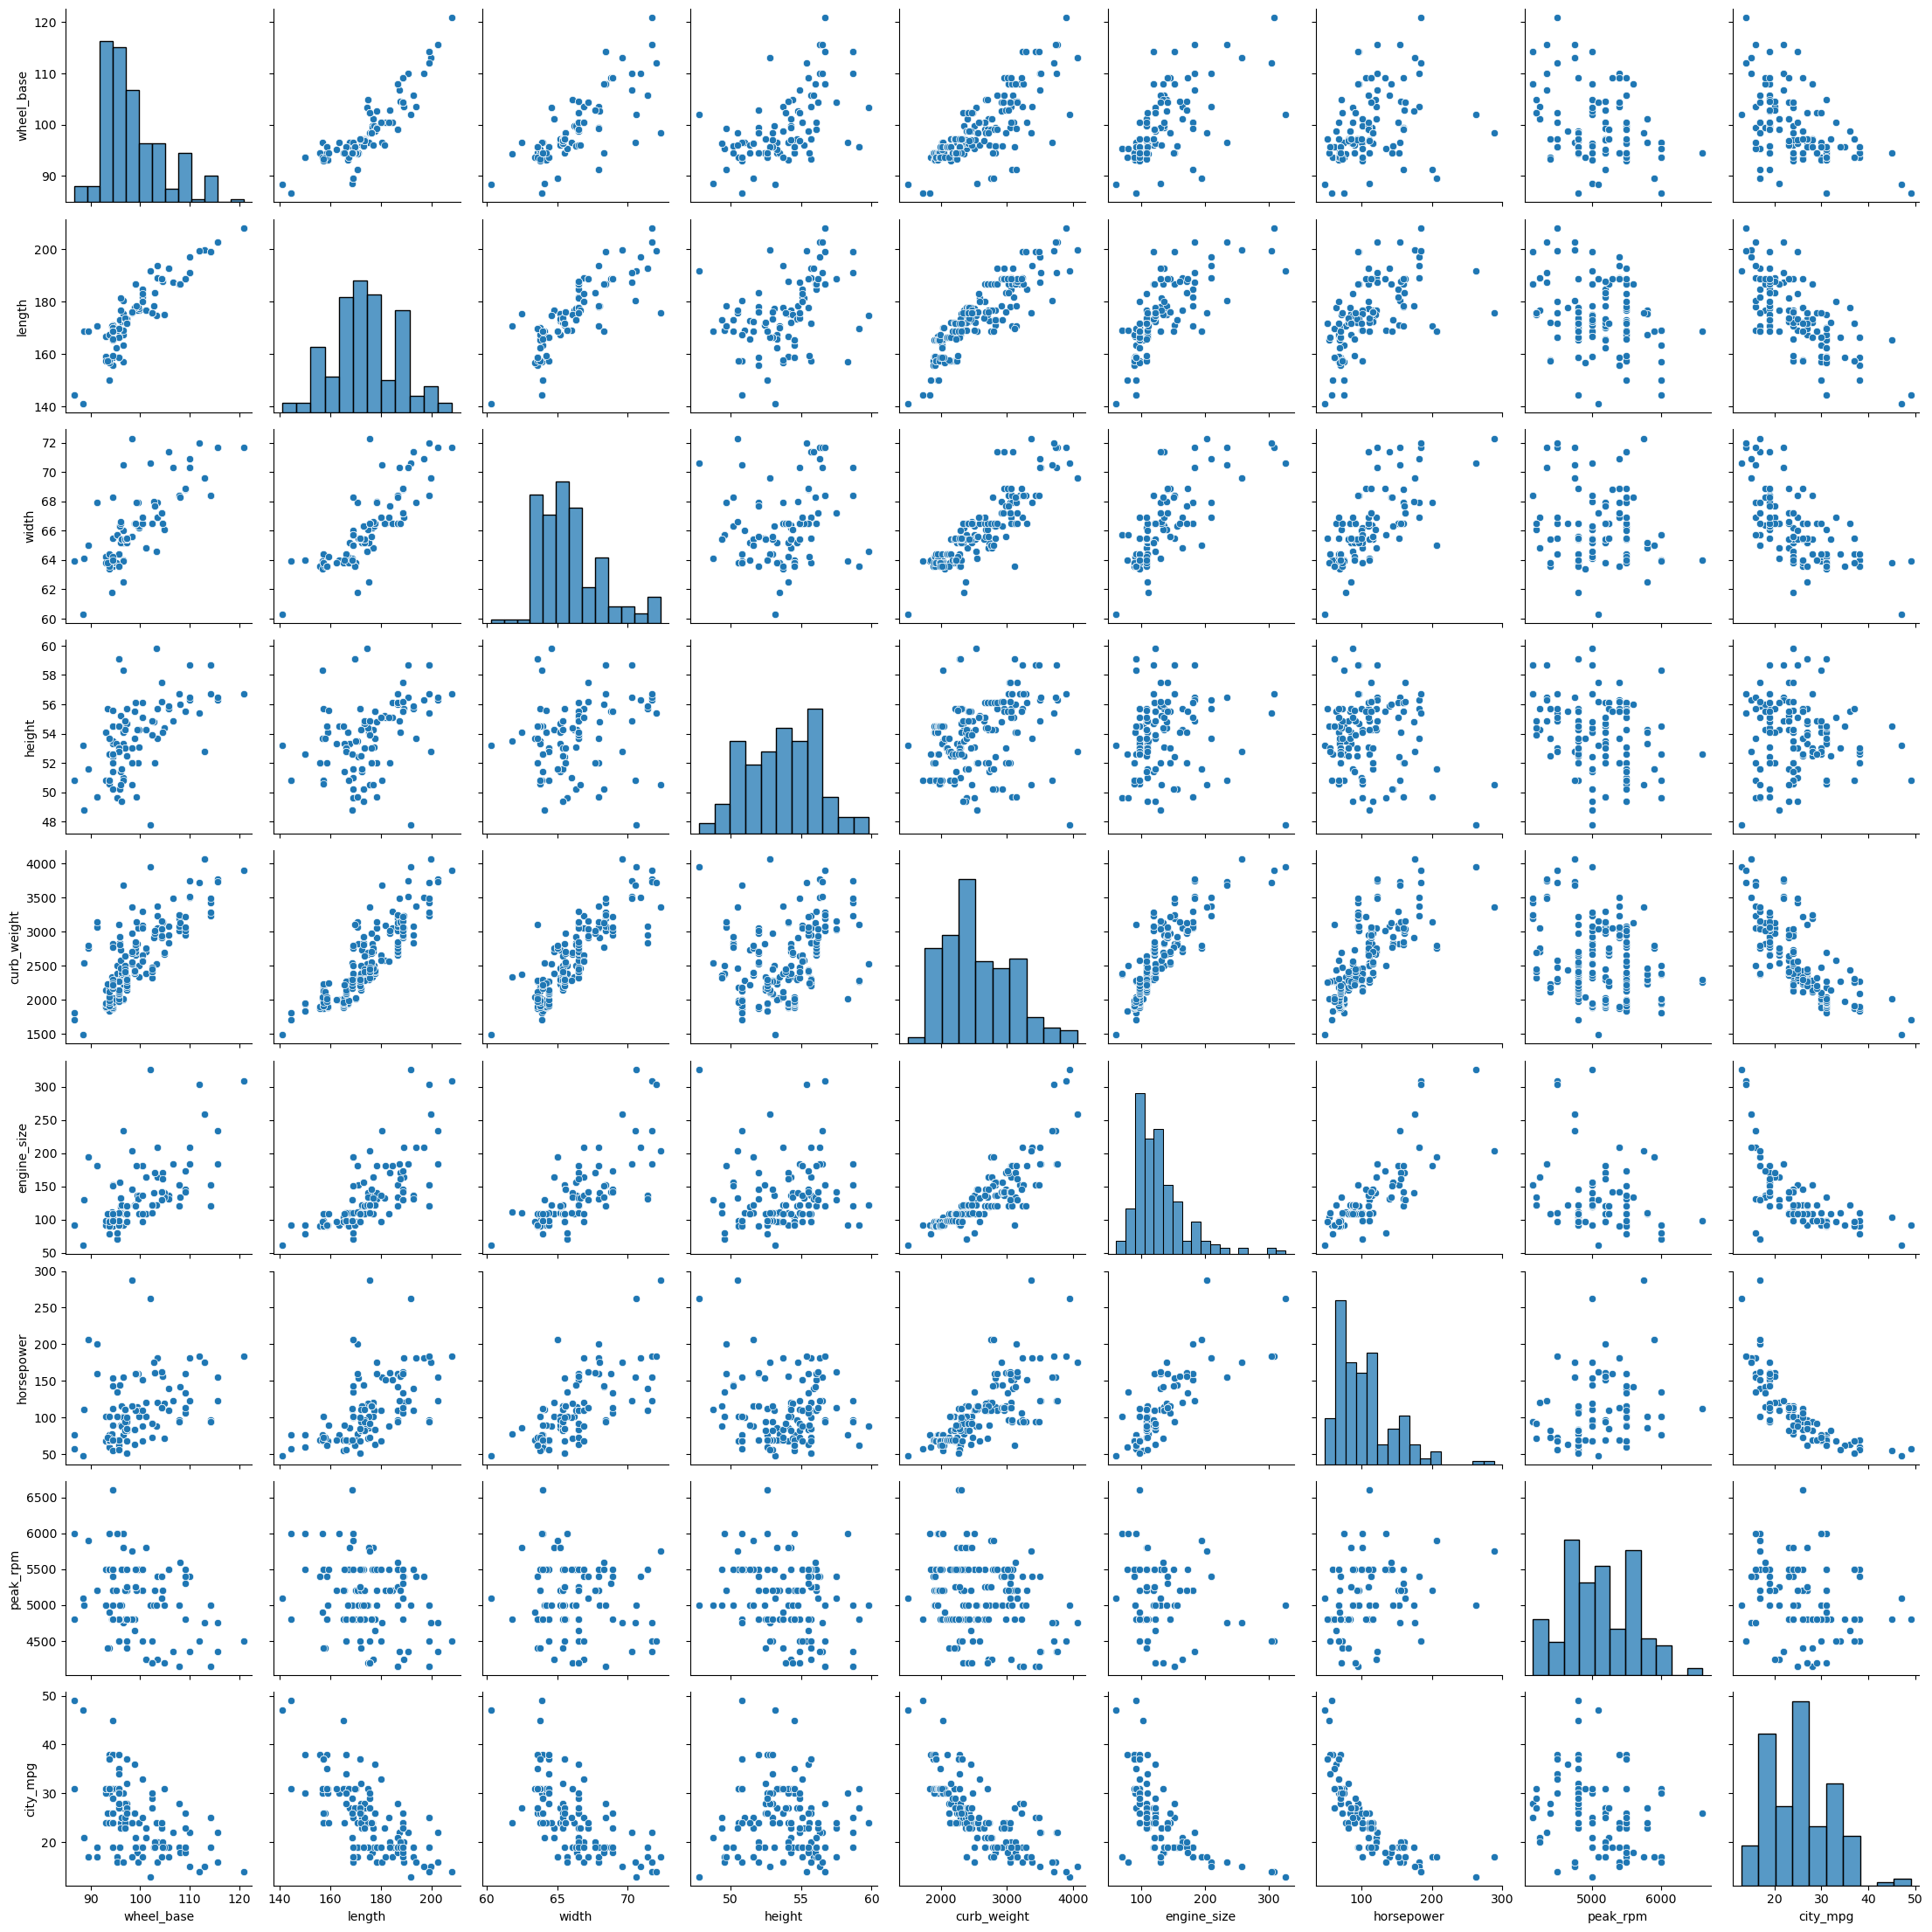

In [11]:
# Pairplot to visualize relationships between variables
sns.pairplot(df)
plt.show()

### Inference: 
* The pairplot visualizes relationships between all pairs of variables. Scatter plots help identify patterns and potential correlations.

* The pairplot reinforces the observations from individual visualizations and EDA.

* Variables like 'engine_size,' 'horsepower,' 'width,' 'wheel_base,' 'length,' and 'city_mpg' exhibit clear patterns in relation to 'curb_weight.'

* Height and peak RPM show less clear patterns, suggesting their impact on curb weight may be less significant.

* These visualizations provide valuable insights into the relationships between the response variable ('curb_weight') and various input variables, aiding in the selection of features for regression modeling.

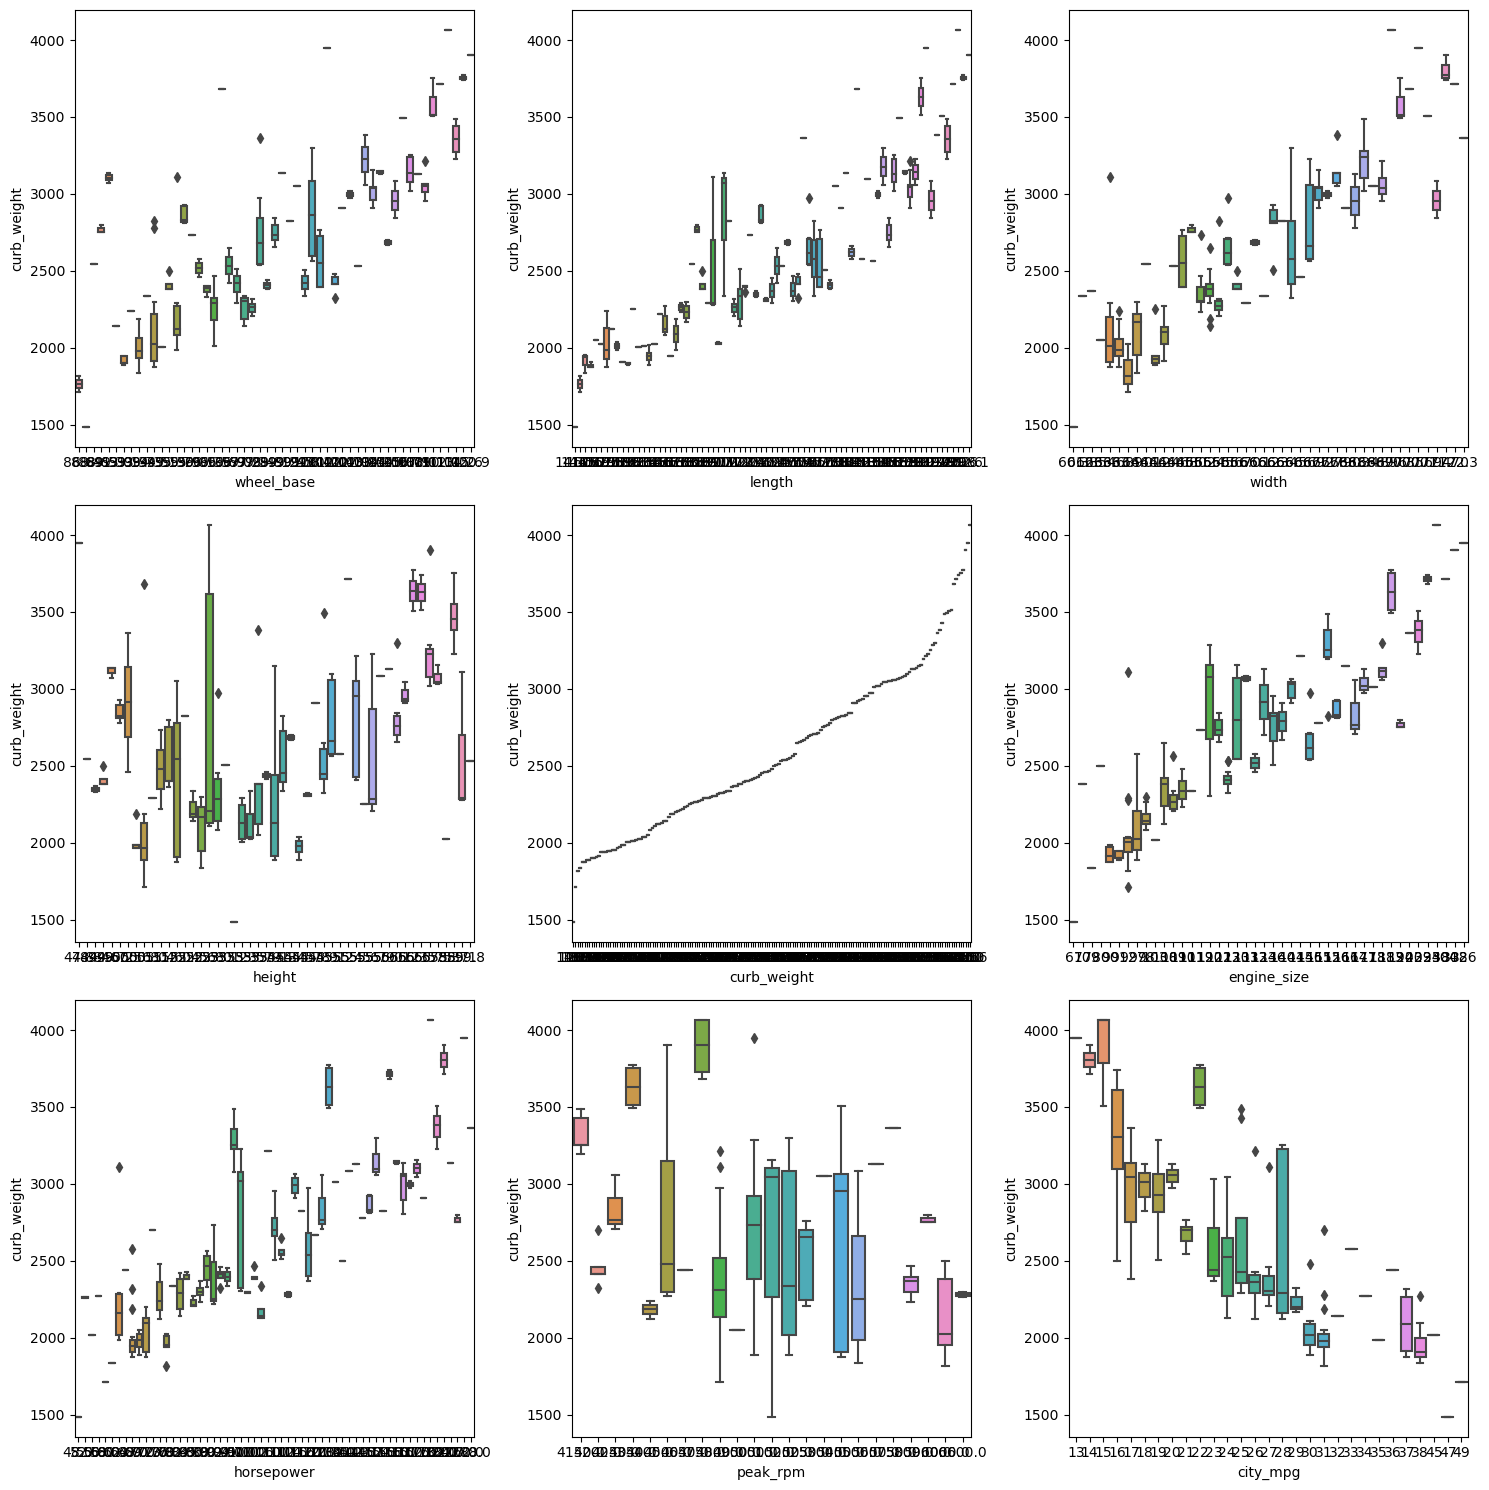

In [12]:
# Boxplot for curb_weight by each explanatory variable
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.boxplot(x=col, y='curb_weight', data=df, ax=axes[i])

plt.tight_layout()
plt.show()

### Inference:
* Boxplots depict the distribution of 'curb_weight' for each explanatory variable. Outliers, central tendencies, and potential predictive power of variables can be observed.

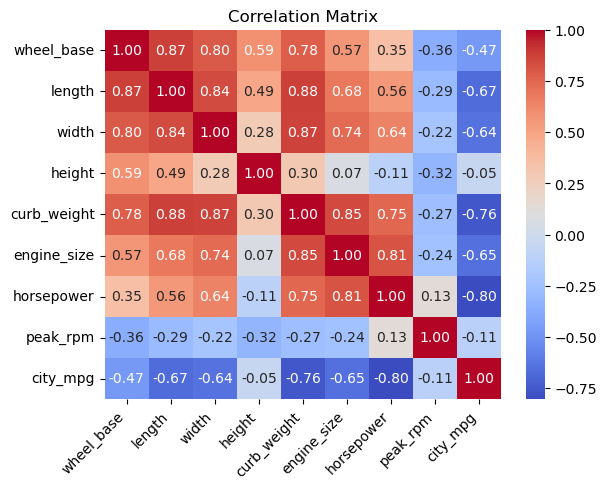

In [13]:
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Matrix')
plt.show()

### Inference:
* The heatmap of the correlation matrix illustrates the strength and direction of relationships between variables. Higher correlations suggest potential predictive power.

# Regression Model Construction & Evaluation:

The process of constructing and evaluating linear regression models to predict 'curb_weight'. We'll select explanatory variables based on EDA findings, implement K-fold cross-validation for model evaluation.

### 1. Feature Selection:
* Based on the EDA, 'engine_size', 'horsepower', and 'width' were identified as key variables with strong positive correlations with 'curb_weight'. These features were selected for model construction.

In [14]:
# Separate target variable and features
X = df.drop('curb_weight', axis=1)
y = df['curb_weight']

### 2. Model Construction:
* We created a linear regression model using scikit-learn's LinearRegression.
* The model includes a preprocessing step (SimpleImputer) to handle missing values by imputing the mean.

In [15]:
# Model 1: Linear Regression with three variables
model_1_features = ['width', 'length', 'engine_size']
model_1 = make_pipeline(SimpleImputer(strategy='mean'), LinearRegression())

In [16]:
# Model 2: Linear Regression with three different variables
model_2_features = ['wheel_base', 'horsepower', 'city_mpg']
model_2 = make_pipeline(SimpleImputer(strategy='mean'), LinearRegression())

### 3. K-fold Cross-Validation:
* Implemented 5-fold cross-validation (n_splits=5) to assess model performance.
* Utilized R^2 as the evaluation metric to measure the goodness of fit.

In [17]:
# K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [18]:
# Custom scorer for R^2
r2_scorer = make_scorer(r2_score)

### 4. Evaluation:
* Calculated the average R^2 score across the 5 folds.
* R^2 measures the proportion of the variance in the dependent variable that is predictable from the independent variable.

In [19]:
# Evaluate Model 1
scores_1 = cross_val_score(model_1, X[model_1_features], y, cv=kf, scoring=r2_scorer)
average_r2_1 = scores_1.mean()

In [20]:
# Evaluate Model 2
scores_2 = cross_val_score(model_2, X[model_2_features], y, cv=kf, scoring=r2_scorer)
average_r2_2 = scores_2.mean()

In [21]:
# Print the results
print(f"Average R^2 for Model 1: {average_r2_1}")
print(f"Average R^2 for Model 2: {average_r2_2}")

Average R^2 for Model 1: 0.8932557284079066
Average R^2 for Model 2: 0.8613254807171311


#### The printed output should show the average R^2 score for the selected linear regression model.

In [22]:
# Select the preferred model
preferred_model = 1 if average_r2_1 > average_r2_2 else 2
print(f"The preferred model is Model {preferred_model}")

The preferred model is Model 1


# Conclusions:

 1. **Feature Selection:** 'engine_size', 'horsepower', and 'width' emerged as crucial predictors for estimating 'curb_weight' based on exploratory data analysis (EDA).

 2. **Linear Regression Models:** Constructed linear regression models using 'engine_size', 'horsepower', and 'width' as explanatory variables, employing a pipeline with mean imputation for missing values.

 3. **K-fold Cross-Validation:** Implemented 5-fold cross-validation for model evaluation, ensuring robust performance assessment across different subsets of the dataset.

 4. **Performance Metrics:** Used R^2 as the evaluation metric to measure the goodness of fit, providing insights into the proportion of variance explained by the models.

 5. **Model 1 Preference:** Model 1, with features 'engine_size', 'horsepower', and 'width', demonstrated an average R^2 of 0.893 in the cross-validation, indicating a strong fit.

 6. **Exploratory Data Analysis (EDA):** EDA highlighted strong positive correlations between selected features and 'curb_weight', guiding the feature selection process.

 7. **Data Preprocessing:** Handled missing values by replacing '?' with NaN and used mean imputation during model construction to ensure data quality.

 8. **Insights from Visualizations:** Pairplots and boxplots provided visual insights into relationships between variables, aiding in the identification of potential predictors.

 9. **Potential for Further Investigation:** Outliers in certain variables were observed during EDA, suggesting the potential for further investigation and potential refinement of the models.

## Overall Verdict:

The selected linear regression model with 'engine_size', 'horsepower', and 'width' as features appears promising for predicting 'curb_weight', demonstrating a strong fit during cross-validation. Further refinement and optimization can be explored for improved predictive performance.